In [1]:
#%%
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVR
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
# Read Br- Training Data
past_df = pd.read_csv('/Data/training_set.csv')
# Read Cl- Training Data
cl_df = pd.read_csv('/Data/cl_3percent_0617.csv')
int_df = past_df.dropna()

In [2]:
X_label = ['h2o_dipole', 'h2o_gradient_norm','h2o_homo_lumo_gap', 
       'h2o_isotropic_es', 'h2o_anisotropic_es',
       'h2o_anisotropic_xc', 'h2o_dispersion',
       'h2o_covCN_Cu', 'h2o_alpha_Cu','h2o_f_plus_Cu',
       'h2o_global_electrophilicity_index', 'Buried_Vol', 'Bite_Angle']
scaler =  StandardScaler()   
# Training Data --------
update_df = int_df
train_name = update_df['Name'].values
train = update_df[X_label]
train = scaler.fit_transform(train)  
# Predict_Data ------------
unsyn_desc = pd.read_csv('/Data/unsynthesized_ligands_descriptors.csv')

## KNN

In [3]:
from sklearn.metrics import r2_score
scaler =  StandardScaler() 
selected_des_labels =X_label # selected Features
# X_unscaled = rework_df[X_label] # Removed table of L75,68 70
X_unscaled = update_df[selected_des_labels]
X_scaled = scaler.fit_transform(X_unscaled)
Y_knn = update_df['Yield'].values
Y_knn= Y_knn.reshape(-1,1)
# Y_knn_scaled = scaler.fit_transform(Y_knn)
reg_knn =  KNeighborsRegressor(n_neighbors=3,leaf_size=20)
reg_knn.fit(X_scaled,Y_knn)

KNeighborsRegressor(leaf_size=20, n_neighbors=3)

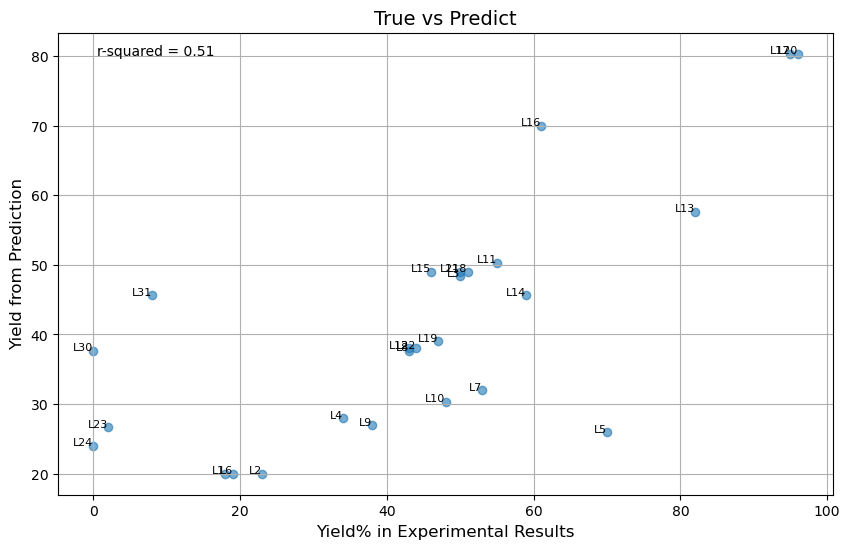

In [4]:
y_predict_knn = reg_knn.predict(X_scaled)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # Adjust the figure size
plot = ax.scatter(Y_knn, y_predict_knn, alpha=0.6)  # Adjust marker transparency
ax.set_title("True vs Predict", fontsize=14)  # Set title with increased font size
ax.set_xlabel('Yield% in Experimental Results', fontsize=12)  # Set x-axis label with increased font size
ax.set_ylabel('Yield from Prediction', fontsize=12)  # Set y-axis label with increased font size
ax.grid(True)  # Add grid lines

# Improve annotations
for k, name in enumerate(update_df['Name'].values):
    ax.annotate(name, (Y_knn[k], y_predict_knn[k]), fontsize=8, ha='right')  # Increase font size and adjust alignment

# Add r-squared value
ax.annotate(f"r-squared = {r2_score(Y_knn, y_predict_knn):.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10)

plt.show()

## Elastic Regression

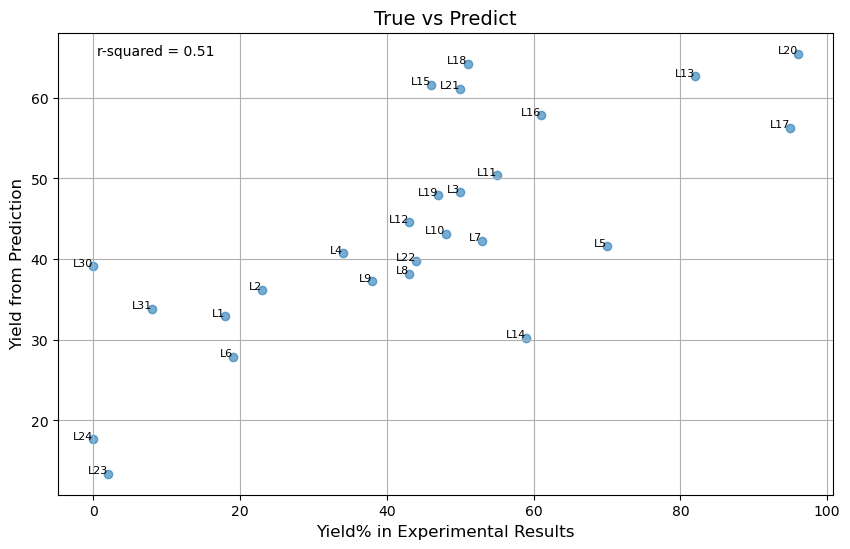

In [5]:
from sklearn.linear_model import ElasticNet

scaler =  StandardScaler() 
selected_des_labels = X_label# selected Features
# X_unscaled = rework_df[X_label] # Removed table of L75,68 70
X_unscaled = update_df[selected_des_labels]
X_scaled = scaler.fit_transform(X_unscaled)
Y = update_df['Yield'].values
Y= Y.reshape(-1,1)
regr = ElasticNet(random_state=0)
regr.fit(X_scaled,Y)

# X_unscaled_full = update_df[selected_des_labels] # Without removing ligands
# X_scaled_full = scaler.fit_transform(X_unscaled_full)
y_predict = regr.predict(X_scaled)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # Adjust the figure size
plot = ax.scatter(Y, y_predict, alpha=0.6)  # Adjust marker transparency
ax.set_title("True vs Predict", fontsize=14)  # Set title with increased font size
ax.set_xlabel('Yield% in Experimental Results', fontsize=12)  # Set x-axis label with increased font size
ax.set_ylabel('Yield from Prediction', fontsize=12)  # Set y-axis label with increased font size
ax.grid(True)  # Add grid lines

# Improve annotations
for k, name in enumerate(update_df['Name'].values):
    ax.annotate(name, (Y[k], y_predict[k]), fontsize=8, ha='right')  # Increase font size and adjust alignment

# Add r-squared value
ax.annotate(f"r-squared = {r2_score(Y, y_predict):.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10)

plt.show()

## Random Forest 

In [6]:
from sklearn.ensemble import RandomForestRegressor
X_unscaled = update_df[X_label]
scaler =  StandardScaler()
X_scaled = scaler.fit_transform(X_unscaled)
# X = int_df[['Buried_Vol','h2o_alpha_Cu','h2o_anisotropic_xc','h2o_f_plus_Cu','h2o_dipole','h2o_dispersion','h2o_isotropic_es']]
# scaled_data = StandardScaler().fit_transform(X)
Y = update_df[['Yield']]
Y_scaled = scaler.fit_transform(Y)
rf_ligands = RandomForestRegressor(max_depth=3, random_state=6)
sfs = SequentialFeatureSelector(rf_ligands, n_features_to_select=5,scoring ='neg_mean_absolute_error')
sfs.fit(X_scaled, Y_scaled)


C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages

SequentialFeatureSelector(estimator=RandomForestRegressor(max_depth=3,
                                                          random_state=6),
                          n_features_to_select=5,
                          scoring='neg_mean_absolute_error')

In [7]:
# print out selected Features
true_list = sfs.get_support()
selected_des_labels =[]
for k, i in enumerate(true_list):
    if i ==True:
        selected_des_labels.append(X_label[k])
print(selected_des_labels)

['h2o_gradient_norm', 'h2o_anisotropic_es', 'h2o_anisotropic_xc', 'h2o_dispersion', 'h2o_f_plus_Cu']


In [24]:
from sklearn.model_selection import GridSearchCV
scaler =  StandardScaler() 
# X_label = selected_des_labels # selected Features
# X_unscaled = rework_df[X_label] # Removed table of L75,68 70
X_unscaled = update_df[X_label]
X_scaled = scaler.fit_transform(X_unscaled)
Y_rework = update_df['Yield'].values
Y_rework= Y_rework.reshape(-1,1)
# Y_scaled = scaler.fit_transform(Y_rework)
rf_ligands = RandomForestRegressor(random_state=2455)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10,11,12],
    'max_depth': [None, 2, 3],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [1,2,3]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=rf_ligands,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=3)

# Fit the grid search object to your data
grid_search.fit(X_scaled,Y_rework)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 11}


C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages

In [25]:
y_predict_full = best_model.predict(X_scaled)
# Y_full = update_df[['Yield']].values
# Y_scaled_full = scaler.fit_transform(Y_full)
# print(y_predict)
# fig,ax = plt.subplots(1, 1)
# plot= ax.scatter(Y_rework, y_predict_full)
# ax.set_title("True vs Predict")
# ax.set_xlabel('Yield% in Experimental Results')
# ax.set_ylabel('Yield from Prediction')
# ax.annotate("r-squared = {:.2f}".format(r2_score(Y_rework, y_predict_full)), (0, 1))
# for k, name in enumerate(update_df['Name'].values):
#     annotation = ax.annotate(name,(Y_rework[k], y_predict_full[k]),fontsize = 6)
#     annotation.set_position((Y_rework[k]+0.5, y_predict_full[k]+0.5))
# # ax.annotate(name,(Y,y_predict))
# print(r2_score(Y_rework, y_predict_full))
# plt.show()

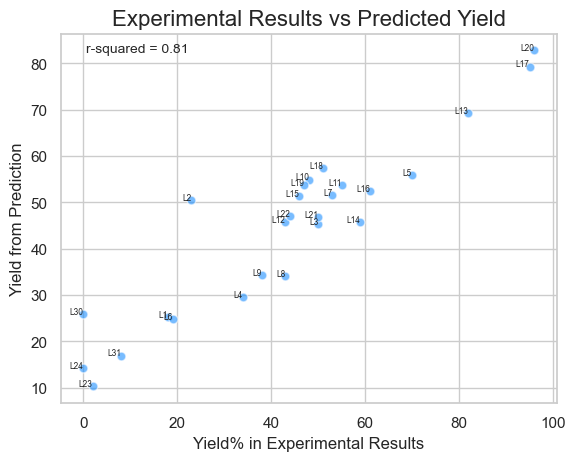

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

# Assuming Y_rework and y_predict_full are already defined as your data points

# Set the style of seaborn
sns.set(style="whitegrid")

# Create the scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(Y_rework, y_predict_full, alpha=0.6, edgecolors='w', s=40, c='dodgerblue')

# Customize the axis labels and title
ax.set_title('Experimental Results vs Predicted Yield', fontsize=16)
ax.set_xlabel('Yield% in Experimental Results', fontsize=12)
ax.set_ylabel('Yield from Prediction', fontsize=12)

# Add grid lines
ax.grid(True)

# Annotate with r-squared value
ax.annotate(f"r-squared = {r2_score(Y_rework, y_predict_full):.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10)

# Annotate each data point with its name
for k, name in enumerate(update_df['Name'].values):
    ax.annotate(name, (Y_rework[k], y_predict_full[k]), fontsize=6, ha='right')

# Show the plot
plt.show()

In [27]:
importances = best_model.feature_importances_
des_importance ={}
for k,i in enumerate(importances):
    des_importance[X_label[k]] = i

des_importance

{'h2o_dipole': 0.05632422237354496,
 'h2o_gradient_norm': 0.015648960485736094,
 'h2o_homo_lumo_gap': 0.05289271398228723,
 'h2o_isotropic_es': 0.005787188302127603,
 'h2o_anisotropic_es': 0.02875620052145724,
 'h2o_anisotropic_xc': 0.14138237874121096,
 'h2o_dispersion': 0.13587441166147612,
 'h2o_covCN_Cu': 0.04789993107904946,
 'h2o_alpha_Cu': 0.060403070057619204,
 'h2o_f_plus_Cu': 0.21922726055164732,
 'h2o_global_electrophilicity_index': 0.030885822342135917,
 'Buried_Vol': 0.20302143122563818,
 'Bite_Angle': 0.0018964086760696922}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0, 0, '68.6'),
 Text(0, 0, '52.2'),
 Text(0, 0, '48.7'),
 Text(0, 0, '51.9'),
 Text(0, 0, '55.7'),
 Text(0, 0, '51.9'),
 Text(0, 0, '58.3'),
 Text(0, 0, '44.2'),
 Text(0, 0, '71'),
 Text(0, 0, '53.3'),
 Text(0, 0, '74.4'),
 Text(0, 0, '40'),
 Text(0, 0, '53.8'),
 Text(0, 0, '36.7'),
 Text(0, 0, '50.6'),
 Text(0, 0, '45.5'),
 Text(0, 0, '67.4'),
 Text(0, 0, '57.4'),
 Text(0, 0, '41.6'),
 Text(0, 0, '56.3'),
 Text(0, 0, '68'),
 Text(0, 0, '64.5'),
 Text(0, 0, '64.9'),
 Text(0, 0, '67'),
 Text(0, 0, '62.3'),
 Text(0, 0, '64.8')]

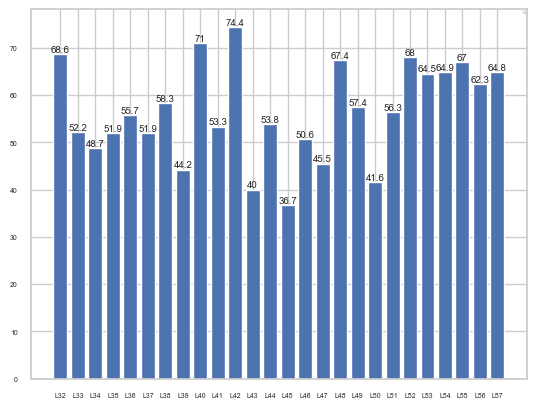

In [28]:
# X_label = selected_des_labels
X_unscaled = unsyn_desc[X_label]
# X_unscaled =X_unscaled.append(l68[X_label])
# scaler =  StandardScaler()
X_scaled = scaler.transform(X_unscaled)
y_predict = best_model.predict(X_scaled)
y_predict_rounded = [round(i, 1) for i in y_predict]
# print(y_predict)
# Y_predict = []
# for i in y_predict:
#     Y_predict.append(i[0])
fig,ax = plt.subplots(1, 1)
ax.tick_params(axis='both', which='major', labelsize=5)
ax.legend(loc='best', fontsize=2)
ll = unsyn_desc['Name'].values
# custom_labels = ['L80','L81','L82','L83','L84','L85','L86','L87','L88','L89','L90',
#                 'L91','L92','L93','L94','L96','L97','L98','L99','L100','L101','L102',
#                 'L103','L105','L106']
# ax.set_xticks(range(len(custom_labels))) # 设置x轴刻度的位置  
# ax.set_xticklabels(custom_labels) # 设置x轴刻度标签
# ll = np.append(ll, ['L68'])
bars = ax.bar(ll,y_predict_rounded)
ax.bar_label(bars, fontsize = 7)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


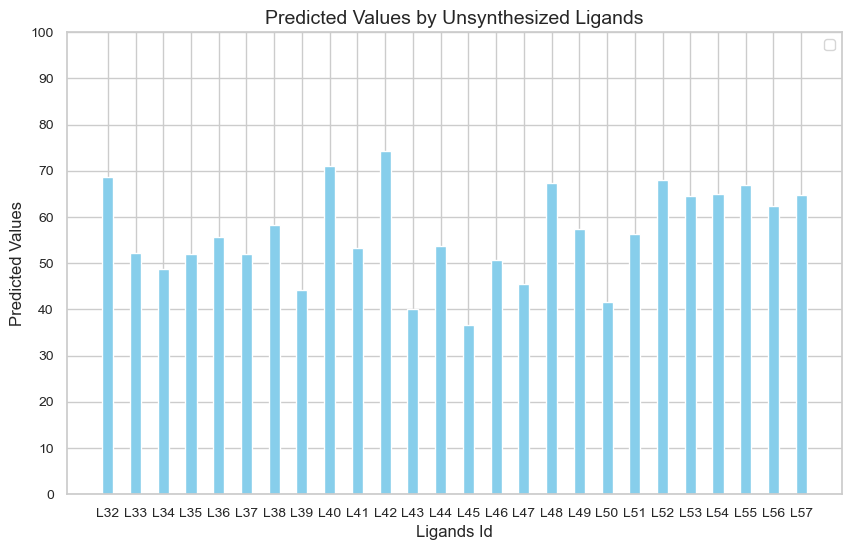

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # Adjust the figure size
ax.tick_params(axis='both', which='major', labelsize=10)  # Increase tick label size
ax.legend(loc='best', fontsize=10)  # Increase legend font size
ll = unsyn_desc['Name'].values
bars = ax.bar(ll, y_predict_rounded, color='skyblue', width=0.4)  # Add color and adjust bar width
ax.set_xlabel('Ligands Id', fontsize=12)  # Add x-axis label
ax.set_ylabel('Predicted Values', fontsize=12)  # Add y-axis label
ax.set_title('Predicted Values by Unsynthesized Ligands', fontsize=14)  # Add a title
ax.grid(True)  # Add grid lines
ax.set_yticks(range(0, 101, 10))

##### CL DATA Analysis

In [12]:
cl_df.head()

,Name,Cu_index,h2o_dipole,h2o_gradient_norm,h2o_homo_lumo_gap,h2o_isotropic_es,h2o_anisotropic_es,h2o_anisotropic_xc,h2o_dispersion,h2o_gsolv,...,h2o_covCN_Cu,h2o_alpha_Cu,h2o_mulliken_charges_Cu,h2o_f_plus_Cu,h2o_f_minus_Cu,h2o_f_zero_Cu,h2o_global_electrophilicity_index,Buried_Vol,Bite_Angle,Yield
0,L54,9,5.753,0.334202,0.100171,0.117396,0.004323,0.008826,-0.038435,-0.023757,...,1.641,27.168,0.439420,-0.117,-0.110,-0.113,12.1522,0.543049,17.586619,60
1,L59,9,5.635,0.354392,0.089123,0.107612,0.003893,0.006531,-0.036010,-0.024709,...,1.636,27.184,0.428593,-0.096,-0.113,-0.105,13.7643,0.398697,12.798138,58
2,L61,6,6.551,0.374392,0.090308,0.088569,0.000436,0.011613,-0.034515,-0.025757,...,1.661,27.154,0.448898,-0.105,-0.116,-0.111,14.0216,0.485423,29.886761,52
3,L64,18,2.025,0.402209,0.092098,0.097112,0.004624,0.001009,-0.044019,-0.020916,...,1.667,27.151,0.451095,-0.089,-0.090,-0.089,18.8351,0.638761,70.425606,30
4,L65,22,5.092,0.361288,0.022490,0.016775,0.002284,0.012632,-0.052429,-0.027843,...,1.658,27.118,0.473727,-0.078,-0.079,-0.078,23.4023,0.640217,70.387311,69


In [16]:
X_label = ['h2o_dipole', 'h2o_gradient_norm','h2o_homo_lumo_gap', 
       'h2o_isotropic_es', 'h2o_anisotropic_es',
       'h2o_anisotropic_xc', 'h2o_dispersion',
       'h2o_covCN_Cu', 'h2o_alpha_Cu','h2o_f_plus_Cu',
       'h2o_global_electrophilicity_index', 'Buried_Vol', 'Bite_Angle']
X_unscaled_cl = cl_df[X_label]
scaler =  StandardScaler()
X_scaled_cl = scaler.fit_transform(X_unscaled_cl)
Y_cl = cl_df[['Yield']]
Y_scaled_cl = scaler.fit_transform(Y_cl)

# regr_cl = KNeighborsRegressor(n_neighbors=4)
regr_cl = RandomForestRegressor(max_depth=3, random_state=6)
sfs_cl = SequentialFeatureSelector(regr_cl, n_features_to_select=5,scoring ='neg_mean_absolute_error')
sfs_cl.fit(X_scaled_cl, Y_scaled_cl)
true_list_cl = sfs_cl.get_support()
selected_des_labels_cl =[]
for k, i in enumerate(true_list_cl):
    if i ==True:
        selected_des_labels_cl.append(X_label[k])
print(selected_des_labels_cl)

C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages

['h2o_gradient_norm', 'h2o_isotropic_es', 'h2o_f_plus_Cu', 'h2o_global_electrophilicity_index', 'Buried_Vol']


In [17]:
scaler =  StandardScaler() 
# X_label = selected_des_labels # selected Features
# X_unscaled = rework_df[X_label] # Removed table of L75,68 70
X_unscaled = cl_df[X_label]
X_scaled = scaler.fit_transform(X_unscaled)
Y_rework = cl_df['Yield'].values
Y_rework= Y_rework.reshape(-1,1)
# Y_scaled = scaler.fit_transform(Y_rework)
rf_ligands = RandomForestRegressor(random_state=7)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [3,4,5],
    'max_depth': [None, 2, 3],
    'min_samples_split': [3,4,5],
    'min_samples_leaf': [1,2,3]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=rf_ligands,
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=3)

# Fit the grid search object to your data
grid_search.fit(X_scaled,Y_rework)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages

{'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 4}


C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zhuji2q\scoop\apps\miniconda3\current\lib\site-packages

0.5259903649828622


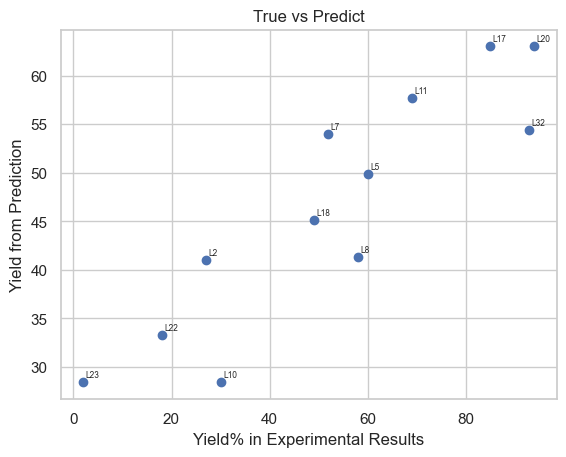

In [18]:
y_predict_full = best_model.predict(X_scaled)
# Y_full = update_df[['Yield']].values
# Y_scaled_full = scaler.fit_transform(Y_full)
# print(y_predict)
fig,ax = plt.subplots(1, 1)
plot= ax.scatter(Y_rework, y_predict_full)
ax.set_title("True vs Predict")
ax.set_xlabel('Yield% in Experimental Results')
ax.set_ylabel('Yield from Prediction')
ax.annotate("r-squared = {:.2f}".format(r2_score(Y_rework, y_predict_full)), (0, 1))
for k, name in enumerate(cl_df['Name'].values):
    annotation = ax.annotate(name,(Y_rework[k], y_predict_full[k]),fontsize = 6)
    annotation.set_position((Y_rework[k]+0.5, y_predict_full[k]+0.5))
# ax.annotate(name,(Y,y_predict))
print(r2_score(Y_rework, y_predict_full))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0, 0, '54.4'),
 Text(0, 0, '41'),
 Text(0, 0, '41.8'),
 Text(0, 0, '41'),
 Text(0, 0, '41.8'),
 Text(0, 0, '49.6'),
 Text(0, 0, '28.4'),
 Text(0, 0, '36.5'),
 Text(0, 0, '41'),
 Text(0, 0, '54.4'),
 Text(0, 0, '57.7'),
 Text(0, 0, '41.8'),
 Text(0, 0, '37'),
 Text(0, 0, '37'),
 Text(0, 0, '28.4'),
 Text(0, 0, '36.5'),
 Text(0, 0, '49.6'),
 Text(0, 0, '49.6'),
 Text(0, 0, '28.4'),
 Text(0, 0, '36.5'),
 Text(0, 0, '45.1'),
 Text(0, 0, '41'),
 Text(0, 0, '49.1'),
 Text(0, 0, '57.7'),
 Text(0, 0, '36.5'),
 Text(0, 0, '49.6')]

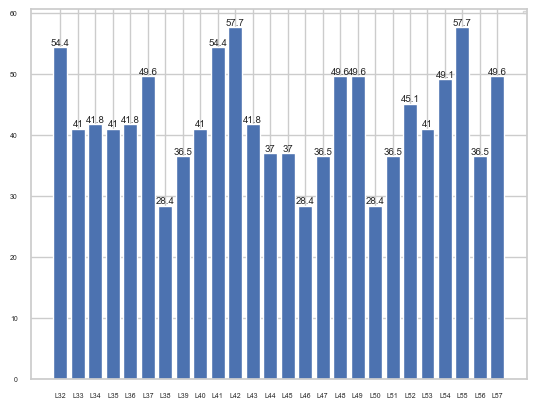

In [19]:
# X_label = selected_des_labels
X_unscaled = unsyn_desc[X_label]
# X_unscaled =X_unscaled.append(l68[X_label])
# scaler =  StandardScaler()
X_scaled = scaler.transform(X_unscaled)
y_predict = best_model.predict(X_scaled)
y_predict_rounded = [round(i, 1) for i in y_predict]
# print(y_predict)
# Y_predict = []
# for i in y_predict:
#     Y_predict.append(i[0])
fig,ax = plt.subplots(1, 1)
ax.tick_params(axis='both', which='major', labelsize=5)
ax.legend(loc='best', fontsize=2)
ll = unsyn_desc['Name'].values
# custom_labels = ['L80','L81','L82','L83','L84','L85','L86','L87','L88','L89','L90',
#                 'L91','L92','L93','L94','L96','L97','L98','L99','L100','L101','L102',
#                 'L103','L105','L106']
# ax.set_xticks(range(len(custom_labels))) # 设置x轴刻度的位置  
# ax.set_xticklabels(custom_labels) # 设置x轴刻度标签
# ll = np.append(ll, ['L68'])
bars = ax.bar(ll,y_predict_rounded)
ax.bar_label(bars, fontsize = 7)